## Lecture 12 -  Nonlinear equations

## Part 1

Up until now, we have been able to turn several problems into systems of linear equations. What happens when you are face with something like this?
$$x=2-e^{-x}$$
These are typically much harder to solve, and there is a lot of things to consider when facing such a problem. The lessons we learn here are applicable to solving many optimization problems, such as data fitting.

There are a number of techniques to solve non-linear equations, and this assignment will look at the most basic; the relaxation method, sometimes called the iterative method

In [1]:
%matplotlib inline
import numpy
import scipy.misc
import matplotlib.pyplot as pyplot
import matplotlib.patches as patches

Simple iteration can teach us a lot about how to think computationally. For the above function, let's try an inital quess of the answer $x=1$ and plug it in. Then we get
$$x'=2-e^{-1}\approx1.632$$
Then we repeat the process
$$x''=2-e^{-1.632}\approx1.804$$ 
and so on until we converge to a solution.

In [2]:
# -- Try different starting points if you want!
x=-1
# -- How do we stop the iterative process?
# -- For now, lets just run 100 times to see if it does converge.
for i in range(100):
    xp = 2.0-numpy.exp(-1.*x)
    print(f"Iteration : {i:2d}  OLD X : {x:8.6f}  NEW X : {xp:8.6f}")
    x = xp

print(f"END X : {x:8.6f}")

Iteration :  0  OLD X : -1.000000  NEW X : -0.718282
Iteration :  1  OLD X : -0.718282  NEW X : -0.050906
Iteration :  2  OLD X : -0.050906  NEW X : 0.947776
Iteration :  3  OLD X : 0.947776  NEW X : 1.612398
Iteration :  4  OLD X : 1.612398  NEW X : 1.800591
Iteration :  5  OLD X : 1.800591  NEW X : 1.834799
Iteration :  6  OLD X : 1.834799  NEW X : 1.840354
Iteration :  7  OLD X : 1.840354  NEW X : 1.841239
Iteration :  8  OLD X : 1.841239  NEW X : 1.841379
Iteration :  9  OLD X : 1.841379  NEW X : 1.841401
Iteration : 10  OLD X : 1.841401  NEW X : 1.841405
Iteration : 11  OLD X : 1.841405  NEW X : 1.841406
Iteration : 12  OLD X : 1.841406  NEW X : 1.841406
Iteration : 13  OLD X : 1.841406  NEW X : 1.841406
Iteration : 14  OLD X : 1.841406  NEW X : 1.841406
Iteration : 15  OLD X : 1.841406  NEW X : 1.841406
Iteration : 16  OLD X : 1.841406  NEW X : 1.841406
Iteration : 17  OLD X : 1.841406  NEW X : 1.841406
Iteration : 18  OLD X : 1.841406  NEW X : 1.841406
Iteration : 19  OLD X : 1.

Clearly it converges quite early, and 100 steps was unecessary.

#### Example 2

- Use `numpy.isclose` to compare variables `x` and `xp` and add a stopping test to the loop above. Stop when the absolute tolerance is within `1E-8` and the relative tolerance is 0.

- Try different starting values in  the range of $\pm10$. (Sicne the solution is around $1.84$, let's not go crazy with our guesses.)  Can you find any range of initia values that do not converge?

In [3]:
# By putting the method into a function, I can re-use
# it with different starting guesses.
# -----------------
def relaxation(x):
    for i in range(20):
        xp = 2.0-numpy.exp(-1.*x)
        print(f"Iteration : {i:3d}  OLD X : {x:8.6g}  NEW X : {xp:8.6g}")
        if (numpy.isclose(x,xp,atol=1.E-12,rtol=0.)) :
            break
        else :
            x  = xp
    print(f"END X : {x:8.6g}")
    return
# -----------------

x=-2.0
print(f"Starting with x = {x}")
relaxation(x)

Starting with x = -2.0
Iteration :   0  OLD X :       -2  NEW X : -5.38906
Iteration :   1  OLD X : -5.38906  NEW X : -216.997
Iteration :   2  OLD X : -216.997  NEW X : -1.73947e+94
Iteration :   3  OLD X : -1.73947e+94  NEW X :     -inf
Iteration :   4  OLD X :     -inf  NEW X :     -inf
END X :     -inf


<ipython-input-3-e4b37ddccc6f>:6: RuntimeWarning: overflow encountered in exp
  xp = 2.0-numpy.exp(-1.*x)


We find that starting values less than $-2$ tend not to converge. Why could that be?

The types of problems we are facing here are of the form 
$$x=f(x)$$
where $f(x)$ is some known function. Thus we are looking for the point where the line $y=x$ and the curve $y=f(x)$ intersect.

Even if you don't think you have this type of equation, for example like this;
$$\log{x}+x^2-1=0,$$
we can rearrange until we get
$$x=e^{1-x^2}$$

What if there is more than one solution? Then an iteration method will converge to one solution and not another. How do you test for additional solutions? You have to repeat the process, choosing a starting point near each expected solution. But that means having a good idea of the solutions in the first place.

Can this method fail?

#### Example  3

There are two solutions to $x=2-e^{-x}$. Find the second one.

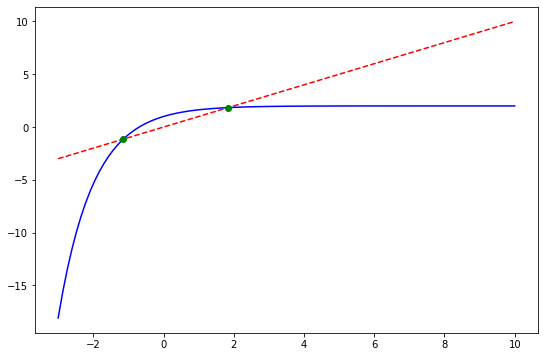

In [4]:
def f(x) : 
    return 2.0-numpy.exp(-1.*x)

x = numpy.linspace(-3,10,101)
y = f(x)

pyplot.figure(figsize=(9,6))
pyplot.plot(x,x,"r--")
pyplot.plot(x,y,"b-")
pyplot.plot(1.84141,1.84141,"go")
pyplot.plot(-1.1461931,-1.1461931,"go")
pyplot.show()
pyplot.close("all")

In [5]:
def relaxation(x):
    for i in range(20):
        xp = -1.*numpy.log(2-x)
        #xp = 2-numpy.exp(-x)
        #print(f"Iteration : {i:3d}  OLD X : {x:8.6g}  NEW X : {xp:8.6g}")
        if (numpy.isclose(x,xp,atol=1.E-12,rtol=0.)) :
            break
        else :
            x  = xp
    #print(f"END X : {x:8.6g}")
    return x
# -----------------
x = 1.841
print(f"Test : {x} = {2-numpy.exp(-x):8.7f}")
print(f"Relaxation method starting at {x} converges to : {relaxation(x):8.6f}")

Test : 1.841 = 1.8413413
Relaxation method starting at 1.841 converges to : -1.146193


Even if we start right next to the second solution, it will not find it.

#### Example 4

Solve for the other $x$ and try again. Start near the first solution at $x=1.84$.

In [6]:
def relaxation(x):
    for i in range(20):
        xp = -numpy.log(2.-x)
        #print(f"Iteration : {i:3d}  OLD X : {x:8.6g}  NEW X : {xp:8.6g}")
        if (numpy.isclose(x,xp,atol=1.E-12,rtol=0.)) :
            break
        else :
            x  = xp
    #print(f"END X : {x:8.8g}")
    return x
# -----------------
x = 1.8414
print(f"Test : {x} = {-numpy.log(2.-x):8.6f}")
print(f"Relaxation method starting at {x:8.6f} converges to : {relaxation(x):8.6f}")

Test : 1.8414 = 1.841370
Relaxation method starting at 1.841400 converges to : -1.146192


Why did that work? Take a Taylor series expansion of the the equation $x=f(x)$ near the true solution $x=a$, and think about what happens close to that point. The condition for convergence is 
$$\left| f'(a)\right|<1$$ and if that doesn't work for one form of the equation, then inverting the equation funcationally will usually work.

In [7]:
from __future__ import division # I don't know why this has to be done.
from sympy import *
x, x0 = symbols('x x0')    # x is not a typical variable anymore; it is a symbol for sympy.
a = symbols('a', integer=False) # a will be the symbol for the solution point
from IPython.display import display, Math # This allows sympy to display the results in latex format

In [8]:
#General Taylor series expansion of f(x) near a
f = Function("f")
display(Math(r"$f(x)=$"))
f(x).series(x, x0=a, n=4)

<IPython.core.display.Math object>

f(a) + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + O((-a + x)**4, (x, a))

In [9]:
#Taylor series expansion of 2-e^(-x)
expression = 2-exp(-x)
display(Math(r"$f(x)=$"))
result = expression.series(x,x0=a,n=4).removeO()
result

<IPython.core.display.Math object>

(-a + x)**3*exp(-a)/6 - (-a + x)**2*exp(-a)/2 + (-a + x)*exp(-a) + 2 - exp(-a)

In [10]:
print(f"Convergence condition for first, positive root: {numpy.abs(numpy.exp(-1.84141))}")
print(f"Convergence condition for second, negative root: {numpy.abs(numpy.exp(-(-1.14619)))}")

Convergence condition for first, positive root: 0.15859365133439846
Convergence condition for second, negative root: 3.1461830879422563


In [11]:
#Taylor series expansion of -ln(2-x)
expression = -log(2-x)
display(Math(r"$f(x)=$"))
result = expression.series(x,x0=a,n=4).removeO()
result

<IPython.core.display.Math object>

-(-a + x)**3/(3*(a - 2)**3) + (-a + x)**2/(2*(a - 2)**2) - (-a + x)/(a - 2) - log(2 - a)

In [12]:
print(f"Convergence condition for first, positive root: {numpy.abs(1/(1.8414-2))}")
print(f"Convergence condition for second, negative root: {numpy.abs(1/(-1.14619-2))}")

Convergence condition for first, positive root: 6.305170239596466
Convergence condition for second, negative root: 0.3178447582631691


#### Example 5

But what about non-invertable equations, like this?
$$x=x^2+\sin{2x}$$
(Yes, one solution is 0, but can we find it?)

In [13]:
x = -0.9

for i in range(100):
    xp = x**2+numpy.sin(2.*x)
    print(f"Iteration : {i:3d}  OLD X : {x:8.6}  NEW X : {xp:8.6}")
    if (numpy.isclose(x,xp,atol=1.E-12,rtol=0.)) :
        break
    elif (xp>1E4) :
        print("TOO BIG! FAILED!")
        break
    else :
        x  = xp

print(f"END X : {x:8.6}")

Iteration :   0  OLD X :     -0.9  NEW X : -0.163848
Iteration :   1  OLD X : -0.163848  NEW X : -0.295016
Iteration :   2  OLD X : -0.295016  NEW X : -0.469353
Iteration :   3  OLD X : -0.469353  NEW X : -0.586502
Iteration :   4  OLD X : -0.586502  NEW X : -0.577934
Iteration :   5  OLD X : -0.577934  NEW X : -0.581138
Iteration :   6  OLD X : -0.581138  NEW X : -0.579988
Iteration :   7  OLD X : -0.579988  NEW X : -0.580407
Iteration :   8  OLD X : -0.580407  NEW X : -0.580255
Iteration :   9  OLD X : -0.580255  NEW X : -0.580311
Iteration :  10  OLD X : -0.580311  NEW X : -0.580291
Iteration :  11  OLD X : -0.580291  NEW X : -0.580298
Iteration :  12  OLD X : -0.580298  NEW X : -0.580295
Iteration :  13  OLD X : -0.580295  NEW X : -0.580296
Iteration :  14  OLD X : -0.580296  NEW X : -0.580296
Iteration :  15  OLD X : -0.580296  NEW X : -0.580296
Iteration :  16  OLD X : -0.580296  NEW X : -0.580296
Iteration :  17  OLD X : -0.580296  NEW X : -0.580296
Iteration :  18  OLD X : -0.5

----

What is the correct method when deciding to stop the iteration method based on some tolerance of convergence? The uncertainty of the error estimate is given by 
$$\epsilon'\approx\frac{x-x'}{1-1/f'(x)}$$
Let's use this to stop the iteration, although it requires knowing $f'(x)$

In [14]:
# --- Let's use the error estimate to stop the iteration process.
# --- We will still keep a for loop of 100 iterations just in cast the solution does not converge.

# --- This is the function on the right hand side of x=f(x)
def f(x) :
    return 2.0-numpy.exp(-1.*x)

# --- This is the derivative of f(x)
def fp(x) :
    return numpy.exp(-1.*x)

x = 0.3

# --- Here is the relaxation loop.
for i in range(100):
    xp = f(x)
    eps = (x-xp)/(1.-(1./fp(xp)))
    # --- I am going to print out the value of eps as calculated...
    print(f"Iteration : {i:3d}  NEW X : {xp:1.10f}  ERROR : {numpy.abs(eps):4.3G}")
    # --- ...but I am going to use its absolute value is small enough for stopping.
    if (numpy.abs(eps)<1E-9) :
        break
    else :
        x  = xp

print("END X : {0:1.10f} ERROR : {1:4.3G}".format(x,numpy.abs(eps)))

Iteration :   0  NEW X : 1.2591817793  ERROR : 0.38
Iteration :   1  NEW X : 1.7161137869  ERROR :  0.1
Iteration :   2  NEW X : 1.8202366089  ERROR : 0.0201
Iteration :   3  NEW X : 1.8380125813  ERROR : 0.00336
Iteration :   4  NEW X : 1.8408666233  ERROR : 0.000538
Iteration :   5  NEW X : 1.8413201492  ERROR : 8.55E-05
Iteration :   6  NEW X : 1.8413920983  ERROR : 1.36E-05
Iteration :   7  NEW X : 1.8414035095  ERROR : 2.15E-06
Iteration :   8  NEW X : 1.8414053193  ERROR : 3.41E-07
Iteration :   9  NEW X : 1.8414056063  ERROR : 5.41E-08
Iteration :  10  NEW X : 1.8414056519  ERROR : 8.58E-09
Iteration :  11  NEW X : 1.8414056591  ERROR : 1.36E-09
Iteration :  12  NEW X : 1.8414056602  ERROR : 2.16E-10
END X : 1.8414056591 ERROR : 2.16E-10


If you don't want to take derivatives (it takes too long, to unstable, etc.) Then you can keep track of three consecutive estimates of $x$ to calculate
$$\epsilon''\approx\frac{(x'-x'')^2}{2x'-x-x''}$$

#### Example 6

Modify the relaxation method code from Example 5 to keep track of three consectuive esitmations of `x`. You should be able to do it by adding about two lines, adding a third variable `xpp`, and changing the definition of `eps`

In [15]:
def f(x) :
    return 2.0-numpy.exp(-1.*x)

x  = 0.3   # Initial guess, iteration 0
xp = f(x)  # First iteration

for i in range(100):
    xpp = f(xp)
    eps = (xp-xpp)**2/(2.*xp-x-xpp)
    print(f"Iteration : {i:3d}  NEW X : {xp:1.10f} ERROR : {numpy.abs(eps):1.3G}")
    if (numpy.abs(eps)<1E-9) :
        break
    else :
        x  = xp   # The previous iteration becomes the iteration two-times ago.
        xp = xpp  # The new iteration becomes the previous iteraion.

print("END X : {0:1.10f} ERROR : {1:4.3G}".format(xpp,numpy.abs(eps)))

Iteration :   0  NEW X : 1.2591817793 ERROR : 0.416
Iteration :   1  NEW X : 1.7161137869 ERROR : 0.0307
Iteration :   2  NEW X : 1.8202366089 ERROR : 0.00366
Iteration :   3  NEW X : 1.8380125813 ERROR : 0.000546
Iteration :   4  NEW X : 1.8408666233 ERROR : 8.57E-05
Iteration :   5  NEW X : 1.8413201492 ERROR : 1.36E-05
Iteration :   6  NEW X : 1.8413920983 ERROR : 2.15E-06
Iteration :   7  NEW X : 1.8414035095 ERROR : 3.41E-07
Iteration :   8  NEW X : 1.8414053193 ERROR : 5.41E-08
Iteration :   9  NEW X : 1.8414056063 ERROR : 8.58E-09
Iteration :  10  NEW X : 1.8414056519 ERROR : 1.36E-09
Iteration :  11  NEW X : 1.8414056591 ERROR : 2.16E-10
END X : 1.8414056602 ERROR : 2.16E-10


#### Example 7 
In the mean field theory of ferromagetism, the strength $M$ of magnetization of a ferromagnetic material like iron depends on the temperature $T$ according to 
$$M=\mu \tanh \frac{JM}{k_BT}$$ 
where $\mu$ is a magentic moment, $J$ is a coupling constant, and $k_B$ is Boltzman's constant. See: [Ising model.][1]


Substitute $m=M/\mu$, and $C=\mu J/k_B$. What is the error in the estimate of $m$? Let $C=1$ (for simplicity) and look for solutions to within $\pm10^{-6}$ as a function of $T$.

[1]: https://en.wikipedia.org/wiki/Ising_model

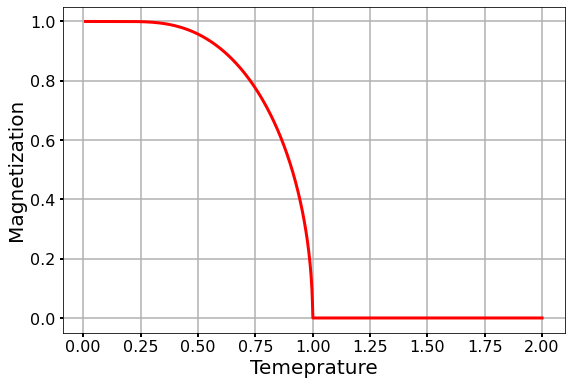

In [16]:
Tmax     = 2.0
N        = 1001
accuracy = 1e-6

mag = []
temp = numpy.linspace(0.01,Tmax,N)

for T in temp :
    # ----
    m1 = 1.0
    error = 1.0
    # ----
    while error>accuracy :
        m2 = numpy.tanh(m1/T)
        error = numpy.abs((m1-m2)/(1.-T*numpy.cosh(m2/T)**2))
        m1 = m2
    # ----
    mag.append(m1)
# ---------------------  

pyplot.figure(figsize=(9,6))
pyplot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
pyplot.ylabel("Magnetization", fontsize=20)
pyplot.xlabel("Temeprature", fontsize=20)
pyplot.plot(temp,mag,'r-',linewidth=3)
pyplot.grid(True,linewidth=1.5,axis="both")
pyplot.show()
pyplot.close()

#### Overrelaxation

We can speed up convergence if we can take a begger steps than $f'(x^*)$. Consider 
$$x'=(1-\alpha)f(x)-\alpha x$$
If $\alpha=0$, then we have normal relaxation. If $\alpha>0$, then we are taking larger steps towards the solution. 

We also have
$$\epsilon' \approx \frac{x-x'}{1-1/\left[(1+\alpha)f'(x)-\alpha\right]}$$